In [46]:
from requests import get
from bs4 import BeautifulSoup
import re
import pandas as pd
from time import sleep
from random import randint
from time import time
from IPython.core.display import clear_output
from warnings import warn
import math
import cv2
import os
import unicodedata
import string
import unidecode
import numpy as np

GATHER DATA

In [47]:
path = "../plot_sums/test"

movie_names = open("{}/movie_names.txt".format(path))
movie_names = movie_names.read().split(",,,")

box_office = open("{}/box_office.txt".format(path))
box_office = box_office.read().split(",,,")

imdbRating = open("{}/movie_ratings.txt".format(path))
imdbRating = imdbRating.read().split(",,,")

metascore = open("{}/metascore.txt".format(path))
metascore = metascore.read().split(",,,")

movie_runtime = open("{}/movie_runtime.txt".format(path))
movie_runtime = movie_runtime.read().split(",,,")
real_runtimes = []
for runtime in movie_runtime:
    real_runtimes.append(runtime.replace(" min", ""))
movie_runtime = real_runtimes

movieBudget = open("{}/movieBudget.txt".format(path))
movieBudget = movieBudget.read().split(",,,")

movieCast = open("{}/movie_cast.txt".format(path))
movieCast = movieCast.read().split(",,,")

movie_directors = open("{}/directors.txt".format(path))
movie_directors = movie_directors.read().split(",,,")

mpaa = open("{}/movie_mpaa.txt".format(path))
mpaa = mpaa.read().split(",,,")

genre = open("{}/movie_genre.txt".format(path))
genre = genre.read().split(",,,")


release = open("{}/releasedate.txt".format(path))
release = release.read().split(",,,")


# ADD DIRECTOR, CAST, MPAA, IMDB RATING
# features = ["box_office", "imdb_rating", "metascore", "movie_mpaa", "movie_names", "movie_runtime", "movieBudget"]

# for i, feature in range(features):
#     name = features[i]
#     name = open("{}/{}.txt".format(path, feature))
#     feature = feature.read().split(",,,")

In [48]:
movie_names = movie_names[:-2001]
print("Movies: {}".format(len(movie_names)))

box_office = box_office[:-2001]
print("Box Office: {}".format(len(box_office)))

imdbRating = imdbRating[:-2001]
print("IMDb Rating: {}".format(len(imdbRating)))

metascore = metascore[:-2001]
print("Metascore: {}".format(len(metascore)))

movie_runtime = movie_runtime[:-2001]
print("Runtime: {}".format(len(movie_runtime)))

movieBudget = movieBudget[:-2001]
print("Budget: {}".format(len(movieBudget)))

movieCast = movieCast[:-2001]
print("Movie Cast: {}".format(len(movieCast)))

movie_directors = movie_directors[:-2001]
print("Movie Directors: {}".format(len(movie_directors)))

genre = genre[:-2001]
genre_rating =[]
for x in genre:
    for idx, val in enumerate(set(genre)):
        if x == val:
            genre_rating.append(idx)
genre = genre_rating
print("Genre: {}".format(len(genre)))

mpaa = mpaa[:-2001]
print("MPAA: {}".format(len(mpaa)))

release = release[:-2001]
print("Release Date: {}".format(len(release)))

Movies: 13000
Box Office: 13000
IMDb Rating: 13000
Metascore: 13000
Runtime: 13000
Budget: 13000
Movie Cast: 13000
Movie Directors: 13000
Genre: 13000
MPAA: 13000
Release Date: 13000


In [49]:
df = pd.DataFrame({
    'name': movie_names,
    'box_office': box_office,
    'rating': imdbRating,
    'metascore': metascore,
    'runtime': movie_runtime,
    'budget': movieBudget,
    'genre': genre,
    'mpaa':mpaa,
    'cast':movieCast,
    'directors':movie_directors,
    'release':release
})
df.head()

,name,box_office,rating,metascore,runtime,budget,genre,mpaa,cast,directors,release
0,Star Wars: Episode VII - The Force Awakens,936662225,8.0,81,136,245000000,177,PG-13,"Harrison Ford,Carrie Fisher,Daisy Ridley,Oscar...",J.J. Abrams,18 December 2015
1,Avengers: Endgame,851612415,8.7,78,181,356000000,177,PG-13,"Robert Downey Jr.,Mark Ruffalo,Scarlett Johans...",Anthony Russo,26 April 2019
2,Avatar,760507625,7.8,83,162,237000000,205,PG-13,"Sam Worthington,Sigourney Weaver,Michelle Rodr...",James Cameron,18 December 2009
3,Black Panther,700059566,7.3,88,134,200000000,177,PG-13,"Chadwick Boseman,Lupita Nyong'o,Martin Freeman...",Ryan Coogler,16 February 2018
4,Avengers: Infinity War,678815482,8.5,68,149,321000000,177,PG-13,"Robert Downey Jr.,Mark Ruffalo,Scarlett Johans...",Anthony Russo,27 April 2018


In [50]:
df.drop(df[df['budget'] == 'null'].index, inplace = True) 
df.drop(df[df['runtime'] == 'null'].index, inplace = True) 
df.drop(df[df['box_office'] == 'null'].index, inplace = True) 
df.drop(df[df['metascore'] == 'null'].index, inplace = True) 
df.drop(df[df['rating'] == 'null'].index, inplace = True) 
df.drop(df[df['mpaa'] == 'null'].index, inplace = True) 
df.drop(df[df['cast'] == 'null'].index, inplace = True) 
df.drop(df[df['directors'] == 'null'].index, inplace = True) 
df.drop(df[df['release'] == 'null'].index, inplace = True) 

In [51]:
mpaa_rating =[]
for x in df['mpaa']:
    for idx, val in enumerate(set(df['mpaa'])):
        if x == val:
            mpaa_rating.append(idx)
new_office = []
for value in df['box_office']:
    new_office.append(float(value))
    
new_budget = []
for value in df['budget']:
    new_budget.append(float(value))

In [52]:
print("Name: {}".format(len(df['name'])))
print("BO: {}".format(len(new_office)))
print("Rating: {}".format(len(df['rating'])))
print("Meta: {}".format(len(df['metascore'])))
print("Runtime: {}".format(len(df['runtime'])))
print("Budget: {}".format(len(df['budget'])))
print("Genre: {}".format(len(df['genre'])))
print("Cast: {}".format(len(df['cast'])))
print("Directors: {}".format(len(df['directors'])))
print("Release: {}".format(len(df['release'])))

Name: 5538
BO: 5538
Rating: 5538
Meta: 5538
Runtime: 5538
Budget: 5538
Genre: 5538
Cast: 5538
Directors: 5538
Release: 5538


In [53]:
df = pd.DataFrame({
    'name': df['name'],
    'box_office': new_office,
    'rating': df['rating'],
#     'metascore': df['metascore'],
    'runtime': df['runtime'],
    'budget': new_budget,
    'genre': df['genre'],
    'mpaa': mpaa_rating,
    'cast':df['cast'],
    'directors':df['directors'],
    'release':df['release']
})

name = []
box_office = []
rating =[]
runtime = []
budget = []
genre = []
mpaa = []
cast = []
directors = []
release = []

for val in df['name']:
  name.append(val)
for val in df['box_office']:
  box_office.append(val)
for val in df['rating']:
  rating.append(val)
for val in df['runtime']:
  runtime.append(val)
for val in df['budget']:
  budget.append(val)
for val in df['genre']:
  genre.append(val)
for val in df['mpaa']:
  mpaa.append(val)
for val in df['cast']:
  cast.append(val)
for val in df['directors']:
  directors.append(val)
for val in df['release']:
    release.append(val)

len(df)

5538

In [53]:
def actor_gross(actors):
    avg_gross_act = []
    for actor in actors:
        # CALCULATE TOTAL MOVIE GROSS
#         avg_gross_act.append(df.loc[df['cast'].astype(str).str.contains(actor), 'box_office'].sum())
        total_gross = df.loc[df['cast'].astype(str).str.contains(actor), 'box_office'].sum()
        total_movies = len(df.loc[df['cast'].astype(str).str.contains(actor)])
        avg_gross_act.append(total_gross/total_movies)
    return avg_gross_act

def director_gross(directors):
    avg_gross_dir = []
    for director in directors:
        # CALCULATE TOTAL MOVIE GROSS
#         avg_gross_act.append(df.loc[df['cast'].astype(str).str.contains(actor), 'box_office'].sum())
        total_gross = df.loc[df['directors'].astype(str).str.contains(director), 'box_office'].sum()
        total_movies = len(df.loc[df['directors'].astype(str).str.contains(director)])
        avg_gross_dir.append(total_gross/total_movies)
    return avg_gross_dir


first_five = []
for cast in df['cast']:
    cast = cast.split(",")
    top_five = cast[:5]
    top_five = ",".join(top_five)
    first_five.append(top_five)

actor_avg = []
counter = 0
for cast in first_five:
    counter += 1
    members = cast.split(",")
    actor_avg.append(actor_gross(members))
    if counter % 500 == 0:
        print(counter)

weighted_actors = []
for val in actor_avg:
    val = sum(val)/len(val)
    val = val*.7
    weighted_actors.append(val)

500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500


In [54]:
dir_avg = []
for cast in df['directors']:
    counter +=1
    members = cast.split(",")
    dir_avg.append(director_gross(members))
    if counter % 500 == 0:
        print(counter)

weighted_directors = []
for val in dir_avg:
    val = sum(val)/len(val)
    val = val * .3
    weighted_directors.append(val)

6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000


In [55]:
star_feature = pd.DataFrame({
    'actor': weighted_actors,
    'director': weighted_directors,
})

star_feature['star_value'] = star_feature['actor'] + star_feature['director']

In [56]:
months = []
for date in df['release']:
    if "January" in date:
        months.append("January")
    elif "February" in date:
        months.append("February")
    elif "March" in date:
        months.append("March")
    elif "April" in date:
        months.append("April")
    elif "May" in date:
        months.append("May")
    elif "June" in date:
        months.append("June")
    elif "July" in date:
        months.append("July")
    elif "August" in date:
        months.append("August")
    elif "September" in date:
        months.append("September")
    elif "October" in date:
        months.append("October")
    elif "November" in date:
        months.append("November")
    elif "December" in date:
        months.append("December")
    else:
        months.append("null")

In [57]:
comp_high = []
comp_med = []
comp_low = []

for comp in months:
    if comp in ["January", "August", "September", "October"]:
        comp_high.append(1)
        comp_med.append(0)
        comp_low.append(0)
    elif comp in ["February", "March", "April", "November", "December"]:
        comp_high.append(0)
        comp_med.append(1)
        comp_low.append(0)
    elif comp in ["May", "June", "July"]:
        comp_high.append(0)
        comp_med.append(0)
        comp_low.append(1)
    else:
        print("ERROR", comp)

ERROR null
ERROR null
ERROR null
ERROR null
ERROR null
ERROR null
ERROR null
ERROR null


In [123]:
df = pd.DataFrame({
    'name': name,
    'box_office': box_office,
    'rating': rating,
#     'metascore': df['metascore'],
    'runtime': runtime,
    'budget': budget,
    'genre': genre,
    'mpaa': mpaa,
    'cast':cast,
    'star_val':star_feature['star_value'],
    'comp_high': comp_high,
    'comp_med': comp_med,
    'comp_low': comp_low
})
df.drop(df[df['release'] == 'null'].index, inplace = True) 
print(len(df))
# print("Name: {}".len(df['name']))
# print("Box Office: {}".len(df['box_office']))
# print("Rating: {}".len(df['rating']))
# print("Runtime: {}".len(df['runtime']))
# print("Budget: {}".len(df['budget']))
# print("Genre: {}".len(df['genre']))
# print("MPAA: {}".len(df['mpaa']))
# print("Cast: {}".len(df['cast']))
# print("Star Val: {}".len(df['star_val']))
df.tail()

ValueError: arrays must all be same length

In [54]:
df.head()

,name,box_office,rating,runtime,budget,genre,mpaa,cast,directors,release
0,Star Wars: Episode VII - The Force Awakens,936662225.0,8.0,136,245000000.0,177,11,"Harrison Ford,Carrie Fisher,Daisy Ridley,Oscar...",J.J. Abrams,18 December 2015
1,Avengers: Endgame,851612415.0,8.7,181,356000000.0,177,11,"Robert Downey Jr.,Mark Ruffalo,Scarlett Johans...",Anthony Russo,26 April 2019
2,Avatar,760507625.0,7.8,162,237000000.0,205,11,"Sam Worthington,Sigourney Weaver,Michelle Rodr...",James Cameron,18 December 2009
3,Black Panther,700059566.0,7.3,134,200000000.0,177,11,"Chadwick Boseman,Lupita Nyong'o,Martin Freeman...",Ryan Coogler,16 February 2018
4,Avengers: Infinity War,678815482.0,8.5,149,321000000.0,177,11,"Robert Downey Jr.,Mark Ruffalo,Scarlett Johans...",Anthony Russo,27 April 2018


In [55]:
X = df[["runtime", "rating", "budget", "genre", "mpaa"]]

In [56]:
y_train_regression = df['box_office']
y_train_regression= y_train_regression.astype(np.float)

In [57]:
X['runtime'] = X['runtime'].astype(np.float)
X['rating'] = X['rating'].astype(np.float)
X['budget'] = X['budget'].astype(np.float)
X['genre'] = X['genre'].astype(np.float)
# X['budget'] = X['budget'].astype(np.float)
X['mpaa'] = X['mpaa'].astype(np.float)

X.head()

c:\users\brian\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\brian\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\brian\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

,runtime,rating,budget,genre,mpaa
0,136.0,8.0,245000000.0,177.0,11.0
1,181.0,8.7,356000000.0,177.0,11.0
2,162.0,7.8,237000000.0,205.0,11.0
3,134.0,7.3,200000000.0,177.0,11.0
4,149.0,8.5,321000000.0,177.0,11.0


In [58]:
y_train_regression.head()

0    936662225.0
1    851612415.0
2    760507625.0
3    700059566.0
4    678815482.0
Name: box_office, dtype: float64

In [59]:
y = []
for value in y_train_regression:
    value = float(value)
#     print (type(value))
    if value <= 1000000:
        y.append(0)
    elif value > 1000000 and value <= 10000000:
        y.append(1)
    elif value > 10000000 and value <= 25000000:
        y.append(2)
    elif value > 25000000 and value <= 50000000:
        y.append(3)
    elif value > 50000000 and value <= 100000000:
        y.append(4)
    elif value > 100000000 and value <= 200000000:
        y.append(5)
    elif value > 200000000 and value <= 300000000:
        y.append(6)
    elif value > 300000000 and value <= 400000000:
        y.append(7)
    elif value > 400000000 and value <= 500000000:
        y.append(8)
    elif value > 500000000:
        y.append(9)

In [60]:
# y

In [61]:

import numpy as np
X_df = X
X = np.array(X)
y = np.array(y)

In [19]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
x_temp = scaler.transform(X)

#X_train, X_test, y_train, y_test = train_test_split(x_temp, y, test_size = 0.2, random_state = 0)

In [20]:
import torch
import torch.utils.data
from torch.autograd import Variable

In [21]:
x_temp[:5]

array([[ 1.53094899,  1.57865845,  5.13967361, -0.43318182,  1.33340096],
       [ 3.96656964,  2.27535217,  7.83331668, -0.43318182,  1.33340096],
       [ 2.93819648,  1.3796031 ,  4.94553717, -0.2530782 ,  1.33340096],
       [ 1.42269918,  0.88196472,  4.04765615, -0.43318182,  1.33340096],
       [ 2.23457273,  2.07629682,  6.98396976, -0.43318182,  1.33340096]])

In [151]:
'''Create tensors for our train and test set. 
As you remember we need variable to accumulate gradients. 
Therefore first we create tensor, then we will create variable '''
# Numpy to Tensor Conversion (Train Set)
X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(y_train)

# Numpy to Tensor Conversion (Train Set)
X_test = torch.from_numpy(X_test)
y_test = torch.from_numpy(y_test)

In [152]:
set(y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [153]:
# Make torch datasets from train and test sets
train = torch.utils.data.TensorDataset(X_train,y_train)
test = torch.utils.data.TensorDataset(X_test,y_test)

# Create train and test data loaders
train_loader = torch.utils.data.DataLoader(train, batch_size = 64, shuffle = True)
test_loader = torch.utils.data.DataLoader(test, batch_size = 64, shuffle = True)

In [22]:
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.modules.batchnorm as bn

In [23]:
class ANN(nn.Module):
    def __init__(self, input_dim = 5, output_dim = 10):
        super(ANN, self).__init__()
    
        # Input Layer (2) -> 784
        self.fc1 = nn.Linear(input_dim, 256)
        # 256 -> 128
        self.fc2 = nn.Linear(256, 128)
        # 128 -> 128
        self.fc3 = nn.Linear(128, 128)
        # 128 -> 64
        self.fc4 = nn.Linear(128, 64)
        # 64 -> 64
        self.fc5 = nn.Linear(64, 64)
        # 64 -> 32
        self.fc6 = nn.Linear(64, 32)
        # 32 -> 32
        self.fc7 = nn.Linear(32, 32)
        # 32 -> output layer(10)
        self.output_layer = nn.Linear(32,10)
        # Dropout Layer (20%) to reduce overfitting
        self.dropout = nn.Dropout(0.2)
        self.batchnorm1 = nn.BatchNorm1d(5)
        self.batchnorm2 = nn.BatchNorm1d(128)
    
    # Feed Forward Function
    def forward(self, x):
        
        # csv input
        x = x.view(-1, 5)
        x = self.batchnorm1(x)
        # Add ReLU activation function to each layer
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.batchnorm2(x)
        # Add dropout layer
        #x = self.dropout(x)
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.dropout(x)
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        x = self.dropout(x)
        # Don't add any ReLU activation function to Last Output Layer
        x = self.output_layer(x)
        
        # Return the created model
        return x

In [24]:
# Create the Neural Network Model
model = ANN(input_dim = 5, output_dim = 10)
# Print its architecture
print(model)

ANN(
  (fc1): Linear(in_features=5, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=64, bias=True)
  (fc6): Linear(in_features=64, out_features=32, bias=True)
  (fc7): Linear(in_features=32, out_features=32, bias=True)
  (output_layer): Linear(in_features=32, out_features=10, bias=True)
  (dropout): Dropout(p=0.2)
  (batchnorm1): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [25]:
import torch.optim as optim
# specify loss function
loss_fn = nn.CrossEntropyLoss()

# specify optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [158]:
# Define epochs (between 20-50)
epochs = 500

# initialize tracker for minimum validation loss
valid_loss_min = np.Inf # set initial "min" to infinity

# Some lists to keep track of loss and accuracy during each epoch
epoch_list = []
train_loss_list = []
val_loss_list = []
train_acc_list = []
val_acc_list = []

# Start epochs
for epoch in range(epochs):
    # monitor training loss
    train_loss = 0.0
    val_loss = 0.0
    
    ###################
    # train the model #
    ###################
    # Set the training mode ON -> Activate Dropout Layers
    model.train() # prepare model for training
    # Calculate Accuracy         
    correct = 0
    total = 0
    
    # Load Train Images with Labels(Targets)
    for data, target in train_loader:
        
        # Convert our feature and labels to Variables to accumulate Gradients
        data = Variable(data).float()
        target = Variable(target).type(torch.LongTensor)
        
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        
        # Calculate Training Accuracy 
        predicted = torch.max(output.data, 1)[1]        
        # Total number of labels
        total += len(target)
        # Total correct predictions
        correct += (predicted == target).sum()
        
        # calculate the loss
        loss = loss_fn(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
    
    # calculate average training loss over an epoch
    train_loss = np.mean(train_loss)
    
    # Avg Accuracy
    accuracy = 100 * correct / float(total)
    
    # Put them in their list
    train_acc_list.append(accuracy)
    train_loss_list.append(train_loss)
    
        
    # Implement Validation like K-fold Cross-validation 
    # Set Evaluation Mode ON -> Turn Off Dropout
    model.eval() # Required for Evaluation/Test

    # Calculate Test/Validation Accuracy         
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:

            # Convert our images and labels to Variables to accumulate Gradients
            data = Variable(data).float()
            target = Variable(target).type(torch.LongTensor)

            # Predict Output
            output = model(data)

            # Calculate Loss
            loss = loss_fn(output, target)
            val_loss += loss.item()*data.size(0)
            # Get predictions from the maximum value
            predicted = torch.max(output.data, 1)[1]

            # Total number of labels
            total += len(target)

            # Total correct predictions
            correct += (predicted == target).sum()
    
    # calculate average training loss and accuracy over an epoch
    val_loss = np.mean(val_loss)
    accuracy = 100 * correct/ float(total)
    
    # Put them in their list
    val_acc_list.append(accuracy)
    val_loss_list.append(val_loss)
    if epoch % 50 == 0:
        # Print the Epoch and Training Loss Details with Validation Accuracy   
        print('Epoch: {} \tTraining Loss: {:.4f}\t Val. acc: {:.2f}%'.format(
            epoch+1, 
            train_loss,
            accuracy
            ))
        # save model if validation loss has decreased
        if val_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            val_loss))
            torch.save(model.state_dict(), 'model.pt')
            valid_loss_min = val_loss
        # Move to next epoch
        epoch_list.append(epoch + 1)

Epoch: 1 	Training Loss: 9028.4260	 Val. acc: 24.00%
Validation loss decreased (inf --> 2010.364628).  Saving model ...
Epoch: 51 	Training Loss: 6676.7237	 Val. acc: 35.00%
Validation loss decreased (2010.364628 --> 1732.867343).  Saving model ...
Epoch: 101 	Training Loss: 6509.3147	 Val. acc: 36.00%
Validation loss decreased (1732.867343 --> 1718.439987).  Saving model ...
Epoch: 151 	Training Loss: 6383.0450	 Val. acc: 34.00%
Epoch: 201 	Training Loss: 6281.6075	 Val. acc: 35.00%
Epoch: 251 	Training Loss: 6109.5739	 Val. acc: 34.00%
Epoch: 301 	Training Loss: 5976.5691	 Val. acc: 32.00%
Epoch: 351 	Training Loss: 5898.6987	 Val. acc: 34.00%
Epoch: 401 	Training Loss: 5821.1662	 Val. acc: 32.00%
Epoch: 451 	Training Loss: 5654.1307	 Val. acc: 33.00%


In [ ]:
torch.load("model.pt")

# Kfold

In [27]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
x_temp = scaler.transform(X)

#X_train, X_test, y_train, y_test = train_test_split(x_temp, y, test_size = 0.2, random_state = 0)

from sklearn.model_selection import KFold
kfolds = KFold(5, False).split(x_temp)
for _, (X_index, y_index) in enumerate(kfolds):
    '''Create tensors for our train and test set. 
    As you remember we need variable to accumulate gradients. 
    Therefore first we create tensor, then we will create variable '''
    X_train = X[X_index]
    y_train = y[X_index]
    X_test = X[y_index]
    y_test = y[y_index]
    X_train = torch.from_numpy(X_train)
    y_train = torch.from_numpy(y_train)

    # Numpy to Tensor Conversion (Train Set)
    X_test = torch.from_numpy(X_test)
    y_test = torch.from_numpy(y_test)
    # Make torch datasets from train and test sets
    train = torch.utils.data.TensorDataset(X_train,y_train)
    test = torch.utils.data.TensorDataset(X_test,y_test)

    # Create train and test data loaders
    train_loader = torch.utils.data.DataLoader(train, batch_size = 64, shuffle = True)
    test_loader = torch.utils.data.DataLoader(test, batch_size = 64, shuffle = True)
    # Define 1epochs (between 20-50)
    epochs = 51

    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf # set initial "min" to infinity

    # Some lists to keep track of loss and accuracy during each epoch
    epoch_list = []
    train_loss_list = []
    val_loss_list = []
    train_acc_list = []
    val_acc_list = []

    # Start epochs
    for epoch in range(epochs):
        # monitor training loss
        train_loss = 0.0
        val_loss = 0.0

        ###################
        # train the model #
        ###################
        # Set the training mode ON -> Activate Dropout Layers
        model.train() # prepare model for training
        # Calculate Accuracy         
        correct = 0
        total = 0

        # Load Train Images with Labels(Targets)
        for data, target in train_loader:

            # Convert our feature and labels to Variables to accumulate Gradients
            data = Variable(data).float()
            target = Variable(target).type(torch.LongTensor)

            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)

            # Calculate Training Accuracy 
            predicted = torch.max(output.data, 1)[1]        
            # Total number of labels
            total += len(target)
            # Total correct predictions
            correct += (predicted == target).sum()

            # calculate the loss
            loss = loss_fn(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update running training loss
            train_loss += loss.item()*data.size(0)

        # calculate average training loss over an epoch
        train_loss = np.mean(train_loss)

        # Avg Accuracy
        accuracy = 100 * correct / float(total)

        # Put them in their list
        train_acc_list.append(accuracy)
        train_loss_list.append(train_loss)


        # Implement Validation like K-fold Cross-validation 
        # Set Evaluation Mode ON -> Turn Off Dropout
        model.eval() # Required for Evaluation/Test

        # Calculate Test/Validation Accuracy         
        correct = 0
        total = 0
        with torch.no_grad():
            for data, target in test_loader:

                # Convert our images and labels to Variables to accumulate Gradients
                data = Variable(data).float()
                target = Variable(target).type(torch.LongTensor)

                # Predict Output
                output = model(data)

                # Calculate Loss
                loss = loss_fn(output, target)
                val_loss += loss.item()*data.size(0)
                # Get predictions from the maximum value
                predicted = torch.max(output.data, 1)[1]

                # Total number of labels
                total += len(target)

                # Total correct predictions
                correct += (predicted == target).sum()

        # calculate average training loss and accuracy over an epoch
        val_loss = np.mean(val_loss)
        accuracy = 100 * correct/ float(total)

        # Put them in their list
        val_acc_list.append(accuracy)
        val_loss_list.append(val_loss)
        if epoch % 50 == 0:
            # Print the Epoch and Training Loss Details with Validation Accuracy   
            print('Epoch: {} \tTraining Loss: {:.4f}\t Val. acc: {:.2f}%'.format(
                epoch+1, 
                train_loss,
                accuracy
                ))
            # save model if validation loss has decreased
            if val_loss <= valid_loss_min:
                print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                valid_loss_min,
                val_loss))
                torch.save(model.state_dict(), 'model.pt')
                valid_loss_min = val_loss
            # Move to next epoch
            epoch_list.append(epoch + 1)

Epoch: 1 	Training Loss: 7239.0473	 Val. acc: 0.00%
Validation loss decreased (inf --> 4513.914797).  Saving model ...
Epoch: 51 	Training Loss: 5497.9877	 Val. acc: 8.00%
Epoch: 1 	Training Loss: 7168.1910	 Val. acc: 17.00%
Validation loss decreased (inf --> 1933.014946).  Saving model ...
Epoch: 51 	Training Loss: 5749.3149	 Val. acc: 5.00%
Epoch: 1 	Training Loss: 6022.3080	 Val. acc: 12.00%
Validation loss decreased (inf --> 1960.617946).  Saving model ...
Epoch: 51 	Training Loss: 5615.8385	 Val. acc: 6.00%
Epoch: 1 	Training Loss: 6115.5569	 Val. acc: 13.00%
Validation loss decreased (inf --> 1996.993006).  Saving model ...
Epoch: 51 	Training Loss: 5588.7773	 Val. acc: 7.00%
Epoch: 1 	Training Loss: 6383.2516	 Val. acc: 14.00%
Validation loss decreased (inf --> 3955.241919).  Saving model ...
Epoch: 51 	Training Loss: 5592.4107	 Val. acc: 10.00%


In [28]:
from sklearn.ensemble import RandomForestClassifier

c:\users\brian\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [29]:
clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)

In [30]:
clf.fit(x_temp, y)  

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [36]:
importances = clf.feature_importances_

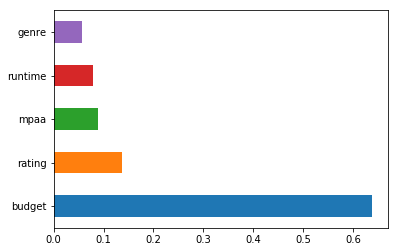

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)

(pd.Series(clf.feature_importances_, index=X_df.columns)
   .nlargest(5)
   .plot(kind='barh'))  